---
author: Delvin Mackenzie
date: 10/20/2019
contact: delvin@uw.edu


<h1>Iperf Dedicated host analysis: Single dedicated host VS two dedicated host.</h1>
<p>Here we analyze statistical differences between running iperf on a shared C4 dedicated host between clients and servers, and two separate C4 dedicated hosts where clients and servers are placed separately.</p>

In [299]:

#import dependencies 
from numpy.random import seed
from numpy.random import randn
from scipy import stats
import numpy as np

import seaborn as sns
sns.set(style="darkgrid")
from matplotlib import pyplot as plt

import pandas as pd
import os

In [201]:
print(os.listdir("./Iaas_Data"))

['iperf c4 single dedicated host 8x clients 8x hosts - Sheet1.csv', '.DS_Store', 'iperf_c4_aug1 - iperf_c4_aug1.csv']


In [154]:
#import csv files
single_host = pd.read_csv("./Iaas_Data/iperf c4 single dedicated host 8x clients 8x hosts - Sheet1.csv", header = 1)
double_host = pd.read_csv("./Iaas_Data/iperf_c4_aug1 - iperf_c4_aug1.csv", header = 2)

In [147]:
double_host.head()

,instanceID,instanceType,experimentID,interval,bandwidthUpload,bandwitdhDownload,Upload,Download,setId,vmId,cmd,Upload.1,Download.1,Upload.2,Download.2,Total
0,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,566 Mbits/sec,576 Mbits/sec,566.0,576.0,1.0,1.0,iperf -c 54.236.204.186 --dualtest --window 41...,NaN,NaN,NaN,NaN,NaN
1,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,581 Mbits/sec,577 Mbits/sec,581.0,577.0,1.0,1.0,iperf -c 54.236.204.186 --dualtest --window 41...,NaN,NaN,NaN,NaN,NaN
2,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,574 Mbits/sec,580 Mbits/sec,574.0,580.0,1.0,1.0,iperf -c 54.236.204.186 --dualtest --window 41...,NaN,NaN,NaN,NaN,NaN
3,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,582 Mbits/sec,578 Mbits/sec,582.0,578.0,1.0,1.0,iperf -c 54.236.204.186 --dualtest --window 41...,NaN,NaN,NaN,NaN,NaN
4,i-0d0503bfdbb72645e,c4.large,1.564714e+09,15.0 sec,579 Mbits/sec,577 Mbits/sec,579.0,577.0,1.0,1.0,iperf -c 54.236.204.186 --dualtest --window 41...,NaN,NaN,NaN,NaN,NaN


In [148]:
single_host.head()

,instanceID,instanceType,experimentID,interval,bandwidthUpload,bandwitdhDownload,Upload,Download,setId,vmId,cmd,Upload.1,Download.1,Upload.2,Download.2,Total
0,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581 Mbits/sec,578 Mbits/sec,581.0,578.0,1.0,1.0,iperf -c 54.161.81.223 --dualtest --window 416...,NaN,NaN,NaN,NaN,NaN
1,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580 Mbits/sec,578 Mbits/sec,580.0,578.0,1.0,1.0,iperf -c 54.161.81.223 --dualtest --window 416...,NaN,NaN,NaN,NaN,NaN
2,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581 Mbits/sec,579 Mbits/sec,581.0,579.0,1.0,1.0,iperf -c 54.161.81.223 --dualtest --window 416...,NaN,NaN,NaN,NaN,NaN
3,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,582 Mbits/sec,578 Mbits/sec,582.0,578.0,1.0,1.0,iperf -c 54.161.81.223 --dualtest --window 416...,NaN,NaN,NaN,NaN,NaN
4,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580 Mbits/sec,579 Mbits/sec,580.0,579.0,1.0,1.0,iperf -c 54.161.81.223 --dualtest --window 416...,NaN,NaN,NaN,NaN,NaN


We have our csv data imported, we can see that single_host has some column headers missing. That is okay though, since they are duplicates from column 4 and 5, just without the trailing text.

Let's clean up our dataframe before we dive into analysis.

In [155]:
#drop non essential columns
double_host = double_host.drop(columns = ['Upload.2', 'Download.2', 'cmd', 'bandwidthUpload', 'bandwitdhDownload', 'Upload.1', 'Download.1', 'Total'])
single_host = single_host.drop(columns = ['Upload.2', 'Download.2', 'cmd', 'bandwidthUpload', 'bandwitdhDownload', 'Upload.1', 'Download.1', 'Total'])

In [156]:
single_host.head()

,instanceID,instanceType,experimentID,interval,Upload,Download,setId,vmId
0,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581.0,578.0,1.0,1.0
1,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580.0,578.0,1.0,1.0
2,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581.0,579.0,1.0,1.0
3,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,582.0,578.0,1.0,1.0
4,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580.0,579.0,1.0,1.0


In [157]:
#create new column for total bandwidth
single_host['total'] = single_host['Upload']+ single_host['Download']
double_host['total'] = double_host['Upload']+ double_host['Download']

In [158]:
single_host.head()

,instanceID,instanceType,experimentID,interval,Upload,Download,setId,vmId,total
0,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581.0,578.0,1.0,1.0,1159.0
1,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580.0,578.0,1.0,1.0,1158.0
2,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,581.0,579.0,1.0,1.0,1160.0
3,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,582.0,578.0,1.0,1.0,1160.0
4,i-0b03be0ade0f8f4d3,c4.large,1.571384e+09,15.0 sec,580.0,579.0,1.0,1.0,1159.0


In [159]:
single_host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
instanceID      396 non-null object
instanceType    396 non-null object
experimentID    396 non-null float64
interval        396 non-null object
Upload          396 non-null float64
Download        396 non-null float64
setId           396 non-null float64
vmId            396 non-null float64
total           396 non-null float64
dtypes: float64(6), object(3)
memory usage: 28.1+ KB


In [196]:
#drop NaN rows
double_host = double_host.dropna()
single_host = single_host.dropna()

Next let's get familiar with the data and look at the high level details.

In [296]:
double_host.describe()

,experimentID,Upload,Download,setId,vmId,total
count,1.496000e+03,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,1.564714e+09,522.720588,373.891711,11.000000,6.000000,896.612299
std,0.000000e+00,108.842973,141.321575,3.874278,3.874278,206.610103
min,1.564714e+09,97.000000,165.000000,1.000000,1.000000,274.000000
25%,1.564714e+09,442.000000,257.000000,8.000000,3.000000,734.750000
50%,1.564714e+09,580.000000,326.000000,12.000000,5.000000,899.000000
75%,1.564714e+09,596.000000,498.250000,14.000000,9.000000,1050.000000
max,1.564714e+09,673.000000,671.000000,16.000000,16.000000,1285.000000


In [297]:
single_host.describe()

,experimentID,Upload,Download,setId,vmId,total
count,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000
mean,1.571384e+09,522.558081,342.416667,5.666667,3.333333,864.974747
std,0.000000e+00,90.821450,132.645375,1.974521,1.974521,196.074242
min,1.571384e+09,186.000000,129.000000,1.000000,1.000000,461.000000
25%,1.571384e+09,443.000000,247.000000,4.000000,2.000000,724.500000
50%,1.571384e+09,567.000000,300.000000,6.000000,3.000000,869.500000
75%,1.571384e+09,595.000000,410.500000,7.000000,5.000000,998.250000
max,1.571384e+09,672.000000,662.000000,8.000000,8.000000,1287.000000


Several points to note here are that the std is much wider in the two dedicated host configuration. Another interesting point is the min upload for the single host configuration is 186 vs 97 for the two host configuration. This may be an outlier but we should investigate this to make sure.

An easy and intuitive way to check this is to see how many data points are between 90 and 186 for the two host configuration. 

In [208]:
double_host.loc[double_host['Upload'] <= 186]

,instanceID,instanceType,experimentID,interval,Upload,Download,setId,vmId,total
1051,i-0d386fae4c84b0150,c4.large,1.564714e+09,15.0 sec,167.0,372.0,14.0,10.0,539.0
1416,i-06f0eb9830ad02618,c4.large,1.564714e+09,15.0 sec,97.0,177.0,16.0,7.0,274.0


There are only two instances below 186. So I think it is safe to conclude they are likely outliers.

In [171]:
double_host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 9 columns):
instanceID      1496 non-null object
instanceType    1496 non-null object
experimentID    1496 non-null float64
interval        1496 non-null object
Upload          1496 non-null float64
Download        1496 non-null float64
setId           1496 non-null float64
vmId            1496 non-null float64
total           1496 non-null float64
dtypes: float64(6), object(3)
memory usage: 105.4+ KB


In [97]:
single_host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
instanceID           396 non-null object
instanceType         396 non-null object
experimentID         396 non-null float64
interval             396 non-null object
bandwidthUpload      396 non-null object
bandwitdhDownload    396 non-null object
setId                396 non-null float64
vmId                 396 non-null float64
totalBandwidth       396 non-null object
dtypes: float64(3), object(6)
memory usage: 28.1+ KB


We notice that the single_host data only contains 396 rows, while the double_host contains 1496 rows. This may be an issue when administering a t-test. <h6>we could look to bootstrap?</h6>

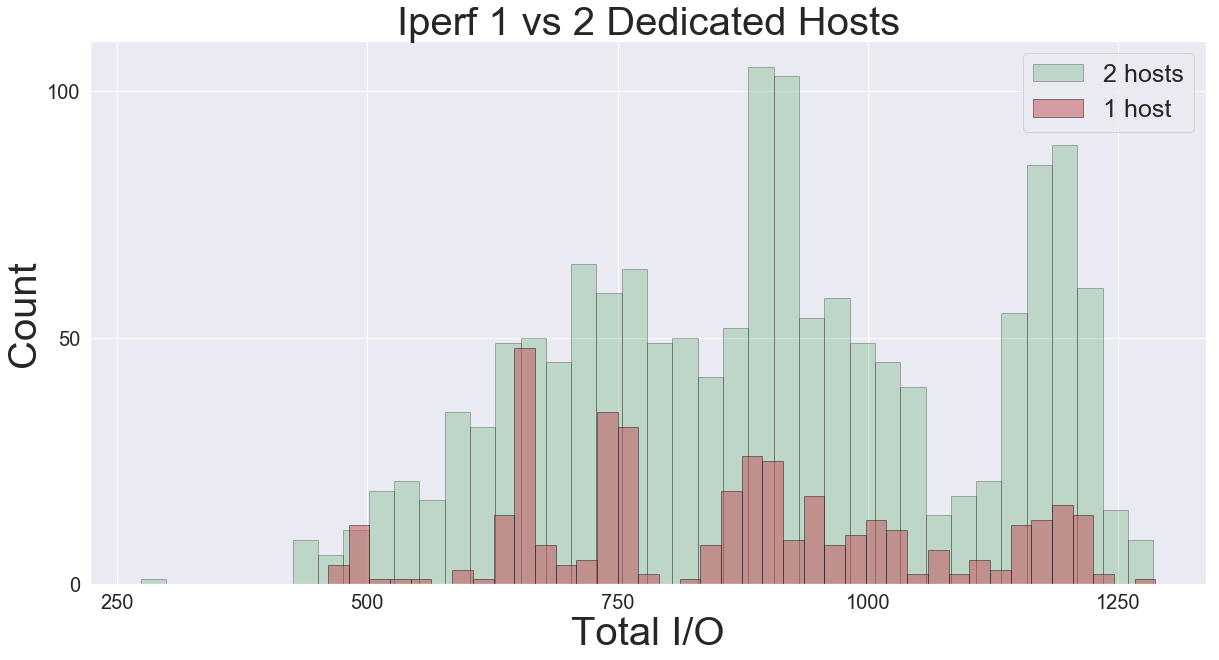

In [247]:
#plot overlay of datasets
plt.figure(figsize = (20, 10))
plt.hist(double_host['total'], bins=40, color='g', edgecolor='k', alpha=0.3)
plt.hist(single_host['total'], bins=40, color='r', edgecolor='k', alpha=0.5)
plt.xlabel('Total I/O', fontSize =40)
plt.xticks(fontSize =20)
plt.yticks(fontSize = 20)
plt.legend(['2 hosts','1 host'], prop={'size': 25})
plt.ylabel('Count', fontSize =40)
plt.title('Iperf 1 vs 2 Dedicated Hosts', fontSize =40)
plt.show()

We want to perform a t-test between the two datasets to see if there are any significant differences. we ill set alpha to 0.05. Our null hypothesis is that there is no remarkable difference between the two datasets. We will perform a t-test on the total bandwidth between the two datasets.

In [291]:
#compute t-test
def printTTest(single, double, count):
    print('t-test for setId '+ str(count) +' upload: ' + str(stats.ttest_ind(single['Upload'],double['Upload'], equal_var = False)))
    print('t-test for setId '+ str(count) +' download: ' + str(stats.ttest_ind(single['Download'],double['Download'], equal_var = False)))
    print('t-test for setId '+ str(count) +' total: ' + str(stats.ttest_ind(single['total'],double['total'], equal_var = False)))
    
printTTest(single_host, double_host, 'all')

t-test for setId all upload: Ttest_indResult(statistic=-0.030308521426614183, pvalue=0.9758293446437107)
t-test for setId all download: Ttest_indResult(statistic=-4.140685264091497, pvalue=3.9175157445880576e-05)
t-test for setId all total: Ttest_indResult(statistic=-2.8227772503016757, pvalue=0.004907383583759384)


Interestingly we see that the download speeds and total speeds reject the null hypotesis, where the upload speeds does not. This tells us that the upload speeds between the two datasets are relatively similiar and statistically insignificant, where download speeds are statistically significant.

In [294]:
#compute std, t-test, and essential metrics for each experiment group like on the google sheet
def computeTTest(single, double):
    for i in range(2, int(double['setId'].max())+1,2):
        #since single has less setIds, we skip every other row for double
        printTTest((single.loc[single['setId'] == i/2]) , (double.loc[double['setId'] == i]), i)
        print()
        
    

In [295]:
computeTTest(single_host, double_host);

t-test for setId 2 upload: Ttest_indResult(statistic=-2.4667291848578885, pvalue=0.02137792883894147)
t-test for setId 2 download: Ttest_indResult(statistic=-1.1477959800076845, pvalue=0.2614781737992037)
t-test for setId 2 total: Ttest_indResult(statistic=-2.604568748468629, pvalue=0.014187937369777838)

t-test for setId 4 upload: Ttest_indResult(statistic=-0.07321655559315503, pvalue=0.9418622053684124)
t-test for setId 4 download: Ttest_indResult(statistic=0.6731881303463566, pvalue=0.5032566415844685)
t-test for setId 4 total: Ttest_indResult(statistic=0.5215615384690365, pvalue=0.6037952496312365)

t-test for setId 6 upload: Ttest_indResult(statistic=0.08924530702596555, pvalue=0.9292076506614713)
t-test for setId 6 download: Ttest_indResult(statistic=-0.21819184832462382, pvalue=0.8278754155360216)
t-test for setId 6 total: Ttest_indResult(statistic=-0.20285332110727983, pvalue=0.8397804947758937)

t-test for setId 8 upload: Ttest_indResult(statistic=1.4830190212372316, pvalue=0.